### Hormone phenotyping
##### E Flynn
##### Last updated: 6/5/2019

The goal of this notebook is to extract the hormone-related phenotypes. These include:
* pregnancy
* menopause status
* pill/HRT
* menstrual phase


We also set up the phenotype definition for menopause:
* Pre-menopause: stated they have not reached menopause -AND- are less than 60 years old
* Post-menopause: >2 years post menopause -AND- had menopause after age 40
* Peri-menopause: w/in 2y menopause
* Premature_menopause: menopause less than age 40
* Unlikely_pre: greater than 60y and says that not reached menopause
* Missing: prefer not to answer or missing

TODO: age is age at visit 0! fix menopause determination for later visits based on this

In [1]:
require('tidyverse')
require('dplyr')
require('reshape2')
options(stringsAsFactors=FALSE)


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.2     ✔ dplyr   0.7.4
✔ tidyr   0.8.1     ✔ stringr 1.3.0
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: reshape2

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths



In [2]:
ss_phe <- read.table("../phe_extraction/sex_spec_pheno.txt", header=TRUE)

In [3]:
head(ss_phe)

IID,age,sex,f.3140.0.0,f.3140.1.0,f.3140.2.0,f.2724.0.0,f.2724.1.0,f.2724.2.0,f.2804.0.0,⋯,f.3591.2.0,f.3700.0.0,f.3700.1.0,f.3700.2.0,f.3710.0.0,f.3710.1.0,f.3710.2.0,f.3720.0.0,f.3720.1.0,f.3720.2.0
2502845,50,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2314965,55,0,0,NA,NA,3,NA,NA,27,⋯,NA,NA,NA,NA,NA,NA,NA,0,NA,NA
1142584,60,0,0,NA,NA,1,NA,NA,35,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3665122,74,0,0,NA,NA,1,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4377492,65,0,0,NA,NA,1,NA,NA,52,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2652670,58,1,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [ ]:
# TODO - parse out correct AGE variable


In [3]:
ss_phe_long <- melt(ss_phe, id.vars=c("IID", "age", "sex"))
head(ss_phe_long)

IID,age,sex,variable,value
2502845,50,1,f.3140.0.0,NA
2314965,55,0,f.3140.0.0,0
1142584,60,0,f.3140.0.0,0
3665122,74,0,f.3140.0.0,0
4377492,65,0,f.3140.0.0,0
2652670,58,1,f.3140.0.0,NA


In [4]:
ss_phe_long$variable <- as.character(ss_phe_long$variable)

In [5]:
ss_phe_long2 <- ss_phe_long %>% separate(variable, c(NA, "trait", "visit", NA))
head(ss_phe_long2)

IID,age,sex,NA,trait,visit,NA,value
2502845,50,1,f,3140,0,0,NA
2314965,55,0,f,3140,0,0,0
1142584,60,0,f,3140,0,0,0
3665122,74,0,f,3140,0,0,0
4377492,65,0,f,3140,0,0,0
2652670,58,1,f,3140,0,0,NA


In [8]:
ss_mat <- dcast(ss_phe_long2,  IID + visit ~ trait, value.var="value")

In [10]:
# remove rows w all NAsz
keep.rows <- apply(ss_mat[,3:ncol(ss_mat)], 1, function(x) any(!is.na(x)))
table(keep.rows)
ss_mat2 <- ss_mat[keep.rows,]



keep.rows
  FALSE    TRUE 
1212655  295235 

In [12]:
# remove rows w IID < 0
ss_mat3 <- filter(ss_mat2, IID >= 0)
head(ss_mat3)

ss_mat4 <- full_join(select(ss_phe, IID, sex, age), ss_mat3)

IID,visit,2724,2804,2834,3140,3546,3581,3591,3700,3710,3720
1000028,0,0,26,0,0,NA,NA,0,20,28,0
1000045,0,1,-1,0,0,60,54,0,NA,NA,NA
1000052,0,1,-1,0,0,-1,-1,0,NA,NA,NA
1000069,0,1,26,0,0,NA,-1,1,NA,NA,NA
1000087,0,1,NA,0,0,NA,50,0,NA,NA,NA
1000118,0,1,-1,0,0,-1,53,0,NA,NA,NA


Joining, by = "IID"


In [15]:
# TODO - age is age at visit 0
# TOOD - change coluymn names
write.table(ss_mat4, file="../data/sex_spec_factor_mat.txt", row.names=FALSE, quote=FALSE, sep="\t")

In [5]:
ss_mat4 <- read.delim(file="../data/sex_spec_factor_mat.txt")

head(ss_mat4)
counts <- sapply(ss_mat4[,2:ncol(ss_mat4)], table)
colnames(ss_mat4)
table(ss_mat4[,c("visit", "X3140")])

IID,sex,age,visit,X2724,X2804,X2834,X3140,X3546,X3581,X3591,X3700,X3710,X3720
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2314965,0,55,0,3,27,0,0,NA,NA,0,NA,NA,0
1142584,0,60,0,1,35,0,0,52,45,0,NA,NA,NA
3665122,0,74,0,1,NA,0,0,55,42,1,NA,NA,NA
4377492,0,65,0,1,52,0,0,NA,52,0,NA,NA,NA
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] "IID"   "sex"   "age"   "visit" "X2724" "X2804" "X2834" "X3140" "X3546"
[10] "X3581" "X3591" "X3700" "X3710" "X3720"

     X3140
visit      0      1      2
    0 272246    150    222
    1  10399      1      1
    2  11312      1      5

In [9]:
phe_codes <- read.csv("../phe_extraction/ListPheCodes.csv", stringsAsFactors=FALSE)
phe_codes$X <- NULL

sex_spec <- filter(phe_codes, category == "sex specific")
sex_spec

#trait_to_name <- split(sex_spec$variable_name, sex_spec$trait)


trait,category,variable_name,readable_name
3140,sex specific,pregnant,pregnant
2724,sex specific,menopause,menopause
3581,sex specific,menopause_age,age menopause
3591,sex specific,hysterectomy,hysterectomy
2834,sex specific,oophorectomy,oophorectomy
3700,sex specific,time_since_period,time since last menstrual period
3710,sex specific,menstrual_length,length of menstrual cycle
3720,sex specific,menstruating,menstruating today
2804,sex specific,birth_control,age when last used the pill
3546,sex specific,HRT,age when last used HRT


## CREATE DERIVED PHENOTYPES

### Pregnant, Pill, or HRT

In [12]:
head(filter(ss_mat4, X3140==0))
table(is.na(ss_mat4$X3140) )

IID,sex,age,visit,X2724,X2804,X2834,X3140,X3546,X3581,X3591,X3700,X3710,X3720
2314965,0,55,0,3,27,0,0,NA,NA,0,NA,NA,0
1142584,0,60,0,1,35,0,0,52,45,0,NA,NA,NA
3665122,0,74,0,1,NA,0,0,55,42,1,NA,NA,NA
4377492,0,65,0,1,52,0,0,NA,52,0,NA,NA,NA
4015997,0,50,0,0,33,0,0,NA,NA,0,0,28,1
2076736,0,60,0,1,45,0,0,NA,45,0,NA,NA,NA



 FALSE   TRUE 
294337 230245 

In [24]:
# DERIVED PHENOTYPES:
#    preg: 1 = possibly or confirmed pregnant (exclude!), 0 = not pregnant, NA = did not answer 
#    hrt / pill:  1= still taking, 0 = not still taking, -1 = time not known, NA = did not answer
ss_mat5 <- ss_mat4 %>% mutate(
    preg=ifelse(X3140==1 | X3140==2, 1, X3140),
    pill=ifelse(X2804==-11, 1, ifelse(X2804 == -3 | X2804==-1,-9, 0)),
    hrt=ifelse(X3546==-11, 1, ifelse(X3546 == -3 | X3546==-1, -9, 0)))
table(ss_mat5$preg)
table(ss_mat5$hrt)
table(ss_mat5$pill)


     0      1 
293957    380 


   -9     0     1 
11233 83604 17571 


    -9      0      1 
 24424 208828   5099 

### Menopause

In [32]:
#head(ss_mat5)

ss_mat6 <- ss_mat5 %>% mutate(
    ooph= ifelse(X2834 == -3 | X2834==-5,-9, X2834),
    hyster= ifelse(X3591 == -3 | X3591==-5,-9, X3591),
    meno = ifelse(X2724 ==-3 | X2724==3,NA, ifelse(X2724 == 2 | X2724== 1, 1, X2724)), # hysterectomy / yes --> yes; not sure/prefer not --> -9
    hyster2= ifelse(X2724==2, 1, 0),
    meno.age=ifelse(X3581 == -3 | X3581==-1,-9, X3581)
    )

head(ss_mat6)
ss_mat7 <- mutate(ss_mat6, 
                  years.post=ifelse(meno.age<0, NA, age - meno.age),# compute the years since menopause
                  surgical.meno=ifelse(ooph == 1 | hyster==1 | hyster2 == 1,1,ifelse(X2834 == -9 & X3591==-9, NA, 0))
                 ) 



IID,sex,age,visit,X2724,X2804,X2834,X3140,X3546,X3581,⋯,X3710,X3720,preg,pill,hrt,ooph,hyster,meno,hyster2,meno.age
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2314965,0,55,0,3,27,0,0,NA,NA,⋯,NA,0,0,0,NA,0,0,NA,0,NA
1142584,0,60,0,1,35,0,0,52,45,⋯,NA,NA,0,0,0,0,0,1,0,45
3665122,0,74,0,1,NA,0,0,55,42,⋯,NA,NA,0,NA,0,0,1,1,0,42
4377492,0,65,0,1,52,0,0,NA,52,⋯,NA,NA,0,0,NA,0,0,1,0,52
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [40]:
label_col <- function(meno, meno.age, age, sex, years.post, surgical.meno){
(if (sex==1 & !is.na(sex)){
    "male"
} else if (any(sapply(c(meno, age, sex), is.na))){
    "missing"
} else if (surgical.meno==1){
    "surgical_meno"
} else if (meno==0){
    ifelse(age > 60, "likely_meno", "pre")
} else {
    if (is.na(meno.age)) {
        "missing_age"
    } else{
           ifelse(meno.age <= 40, "premature",
           ifelse(years.post < 2 | is.na(years.post), "peri", "post")
          ) 
    }


})}
 


df <- ss_mat7
df2 <- df
df2$meno.label <- mapply(label_col, df$meno, df$meno.age, df$age, df$sex, df$years.post, df$surgical.meno)
meno_df <- df2 %>% select(IID, sex, age, visit, preg, pill, hrt, ooph, hyster, meno, hyster2, meno.age, years.post, surgical.meno, meno.label)

In [42]:
table(meno_df$meno.label)
meno_df <- rename(meno_df, "age_v0" ="age")
head(meno_df)


  likely_meno          male       missing   missing_age          peri 
         6333        223531         27851            37           125 
         post           pre     premature surgical_meno 
       140462         57225         14673         54345 

IID,sex,age_v0,visit,preg,pill,hrt,ooph,hyster,meno,hyster2,meno.age,years.post,surgical.meno,meno.label
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,male
2314965,0,55,0,0,0,NA,0,0,NA,0,NA,NA,0,missing
1142584,0,60,0,0,0,0,0,0,1,0,45,15,0,post
3665122,0,74,0,0,NA,0,0,1,1,0,42,32,1,surgical_meno
4377492,0,65,0,0,0,NA,0,0,1,0,52,13,0,post
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,male


In [43]:
write.table(meno_df, file="../phe_extraction/menopause_phe_table.txt", sep="\t", quote=FALSE, row.names=FALSE)


# write out the PHE FILES

phe_lab <- meno_df %>% select(IID, sex, age_v0, meno.label)
pre_meno <- phe_lab %>% filter(meno.label=="pre") %>% select("IID") # 57,225
post_meno <- phe_lab %>% filter(meno.label=="post") %>% select("IID") # 140,462
write_tsv(post_meno, "../phefiles/post_meno.keep")
write_tsv(pre_meno, "../phefiles/pre_meno.keep")

over65_m <- phe_lab %>% filter(age_v0 > 65 & sex==1) %>% select("IID")  #124,403
over65_m %>% write_tsv("../phefiles/over65_m.keep")
over65_f <- phe_lab %>% filter(age_v0 > 65 & sex==0) %>% select("IID") # 151,672
over65_f %>% write_tsv("../phefiles/over65_f.keep")
under65_m <- phe_lab %>% filter(age_v0 < 65 & sex==1) %>% select("IID") # 91,798
under65_m %>% write_tsv("../phefiles/under65_m.keep")
under65_f <- phe_lab %>% filter(age_v0 < 65 & sex==0) %>% select("IID") # 124,205
under65_f %>% write_tsv("../phefiles/under65_f.keep")

# 10 year bin??


# MENSTRUAL PHASE

In [3]:
# NOTE - these questions are poorly worded and have strange cutoffs...
# time since last period: 3700 http://biobank.ndph.ox.ac.uk/showcase/field.cgi?id=3700
# length of menstrual cycle: 3710
# menstruating today: 3720


ss_mat4 <- read.delim(file="../data/sex_spec_factor_mat.txt")


In [19]:
table(ss_mat4$X3720)



   -3    -1     0     1 
  389  1118 66065 11596 

IID,sex,age,visit,X2724,X2804,X2834,X3140,X3546,X3581,X3591,X3700,X3710,X3720
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2314965,0,55,0,3,27,0,0,NA,NA,0,NA,NA,0
1142584,0,60,0,1,35,0,0,52,45,0,NA,NA,NA
3665122,0,74,0,1,NA,0,0,55,42,1,NA,NA,NA
4377492,0,65,0,1,52,0,0,NA,52,0,NA,NA,NA
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA



   -3    -1     0     1 
  389  1118 66065 11596 

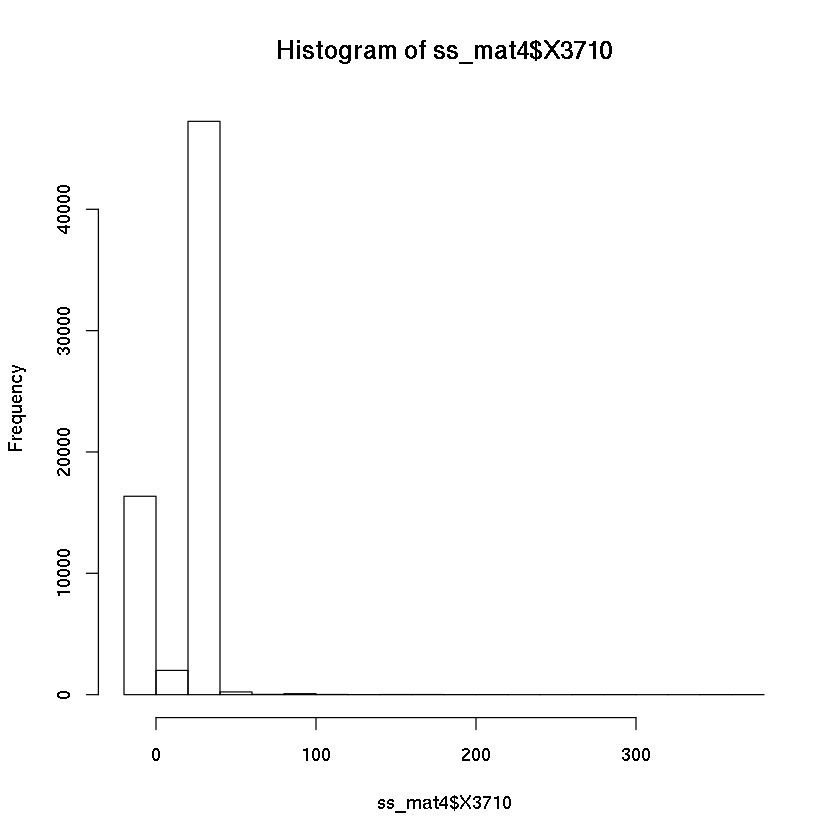


  -3   -1 
 772 7365 


   -6    -3    -1 
11395   777  4178 

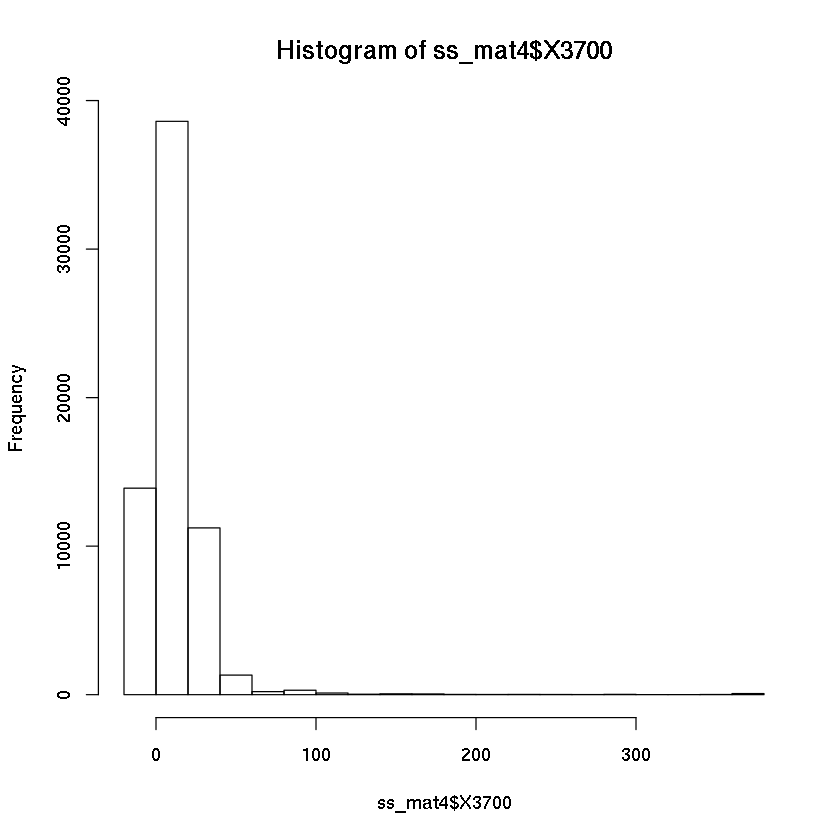

In [5]:
head(ss_mat4)
hist(ss_mat4$X3710)
hist(ss_mat4$X3700)
table(filter(ss_mat4, X3700 < 0)$X3700)
table(filter(ss_mat4, X3710 < 0)$X3710)

#table(ss_mat4$X3700)


    0     1 
48102  1020 

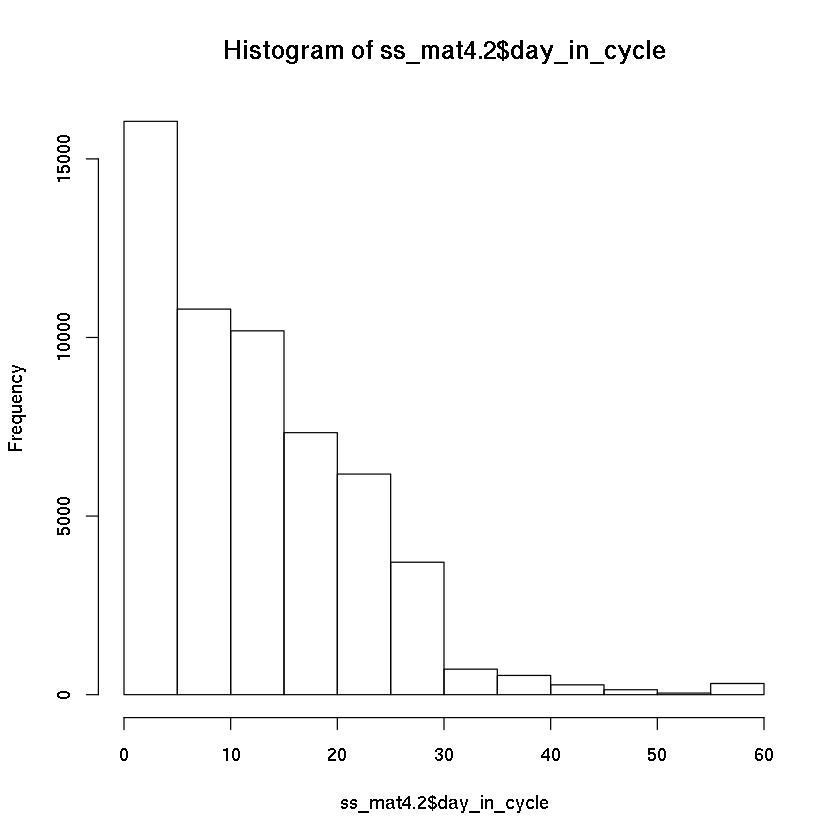

In [12]:
# derived cycle phenotypes

# cycle length must be between 12 and 60
# identify folks who are outside their cycle length by a lot


ss_mat4.2 <- ss_mat4 %>% mutate(
    period_today=ifelse(X3720 == -3 | X3720==-1,NA,X3720),
    irregular=ifelse(X3710 == -3 | X3710==-1,NA, ifelse(X3710==-6, 1, 0)), # -6 --> irregular
    cycle_length = ifelse(X3710 < 12, NA, ifelse(X3710 > 60, NA, X3710)) # filter > 60d
    ) %>% mutate(
    outside_cycle =ifelse(is.na(cycle_length), NA, ifelse(X3700 > 1.5*cycle_length, 1, 0))) %>% mutate(
        day_in_cycle = ifelse(X3700 <0 , NA, ifelse(X3700 > 60 | 
                                                    (!is.na(outside_cycle) & outside_cycle==1), NA, X3700)))

hist(ss_mat4.2$day_in_cycle)
table(ss_mat4.2$outside_cycle)

In [25]:
# add menstrual_phase
ss_mat4.3 <- ss_mat4.2 %>% mutate(
    normalized_day_in_cycle=ifelse(irregular | is.na(cycle_length) | is.na(day_in_cycle), NA,
                                   day_in_cycle/cycle_length*28)) %>% mutate(
    menstrual_phase=ifelse(period_today, "menstrual",
                            ifelse(is.na(normalized_day_in_cycle) | normalized_day_in_cycle > 15 & period_today == 1, NA, 
                                   ifelse(normalized_day_in_cycle < 10, "follicular",
                                        ifelse(normalized_day_in_cycle < 17, "peri-ov",
                                            ifelse(normalized_day_in_cycle < 26, "luteal", "late-luteal"))))))
head(ss_mat4.3)
table(ss_mat4.3$menstrual_phase)

IID,sex,age,visit,X2724,X2804,X2834,X3140,X3546,X3581,⋯,X3700,X3710,X3720,period_today,irregular,cycle_length,outside_cycle,day_in_cycle,normalized_day_in_cycle,menstrual_phase
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2314965,0,55,0,3,27,0,0,NA,NA,⋯,NA,NA,0,0,NA,NA,NA,NA,NA,NA
1142584,0,60,0,1,35,0,0,52,45,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3665122,0,74,0,1,NA,0,0,55,42,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
4377492,0,65,0,1,52,0,0,NA,52,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA



 follicular late-luteal      luteal   menstrual     peri-ov 
      10829        3505       11161       11596       11028 

In [28]:
meno_df <- read.table("../phe_extraction/menopause_phe_table.txt", header=TRUE)
head(meno_df)
meno_df2 <- full_join(meno_df, select(ss_mat4.3, c("IID", "period_today", "irregular", "cycle_length", "outside_cycle", "day_in_cycle", "normalized_day_in_cycle", "menstrual_phase")))

IID,sex,age_v0,visit,preg,pill,hrt,ooph,hyster,meno,hyster2,meno.age,years.post,surgical.meno,meno.label
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,male
2314965,0,55,0,0,0,NA,0,0,NA,0,NA,NA,0,missing
1142584,0,60,0,0,0,0,0,0,1,0,45,15,0,post
3665122,0,74,0,0,NA,0,0,1,1,0,42,32,1,surgical_meno
4377492,0,65,0,0,0,NA,0,0,1,0,52,13,0,post
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,male


Joining, by = "IID"


In [30]:
head(meno_df2)
write.table(meno_df2, file="../data/phase_meno.txt", sep="\t", quote=FALSE, row.names=FALSE)

IID,sex,age_v0,visit,preg,pill,hrt,ooph,hyster,meno,⋯,years.post,surgical.meno,meno.label,period_today,irregular,cycle_length,outside_cycle,day_in_cycle,normalized_day_in_cycle,menstrual_phase
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,male,NA,NA,NA,NA,NA,NA,NA
2314965,0,55,0,0,0,NA,0,0,NA,⋯,NA,0,missing,0,NA,NA,NA,NA,NA,NA
1142584,0,60,0,0,0,0,0,0,1,⋯,15,0,post,NA,NA,NA,NA,NA,NA,NA
3665122,0,74,0,0,NA,0,0,1,1,⋯,32,1,surgical_meno,NA,NA,NA,NA,NA,NA,NA
4377492,0,65,0,0,0,NA,0,0,1,⋯,13,0,post,NA,NA,NA,NA,NA,NA,NA
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,male,NA,NA,NA,NA,NA,NA,NA


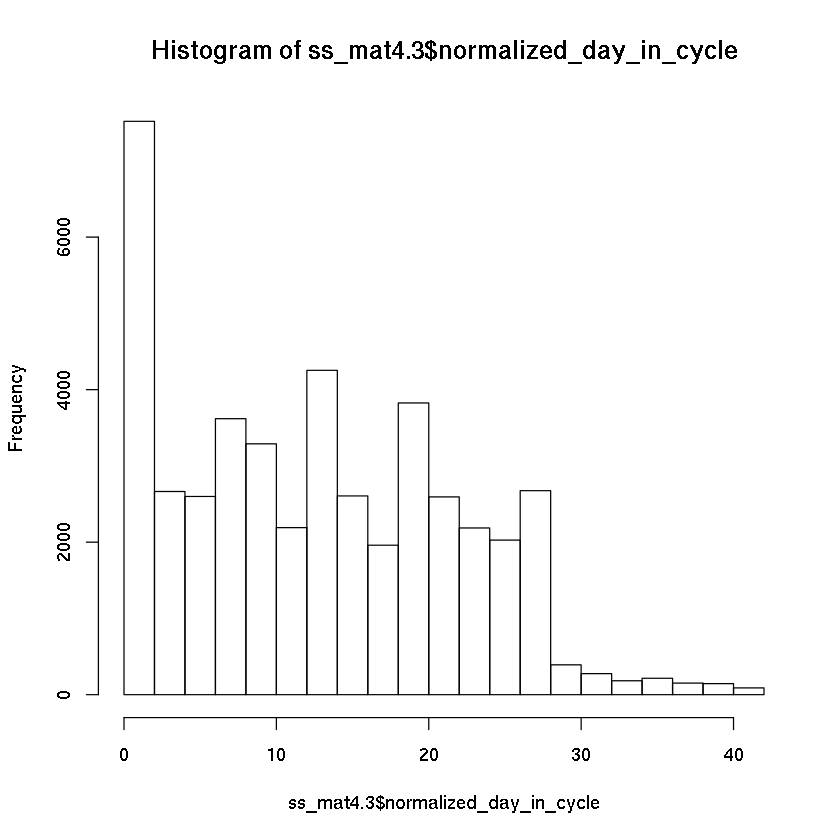

In [18]:
hist(ss_mat4.3$normalized_day_in_cycle)

Warning message:
“Removed 1136 rows containing non-finite values (stat_bin).”

Warning message:
“Removed 3095 rows containing non-finite values (stat_bin).”

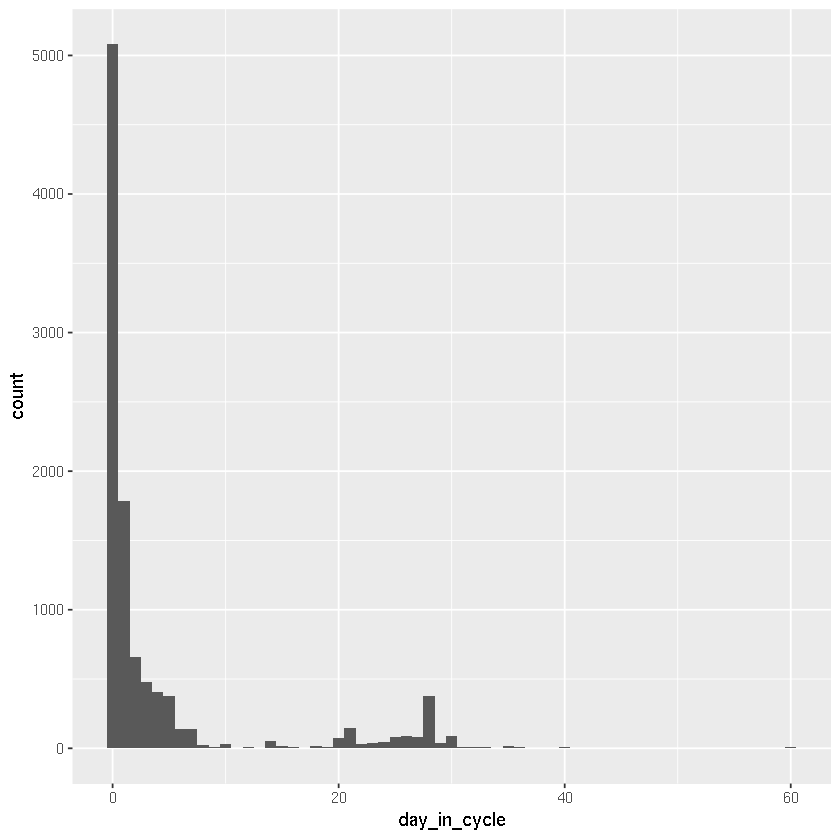

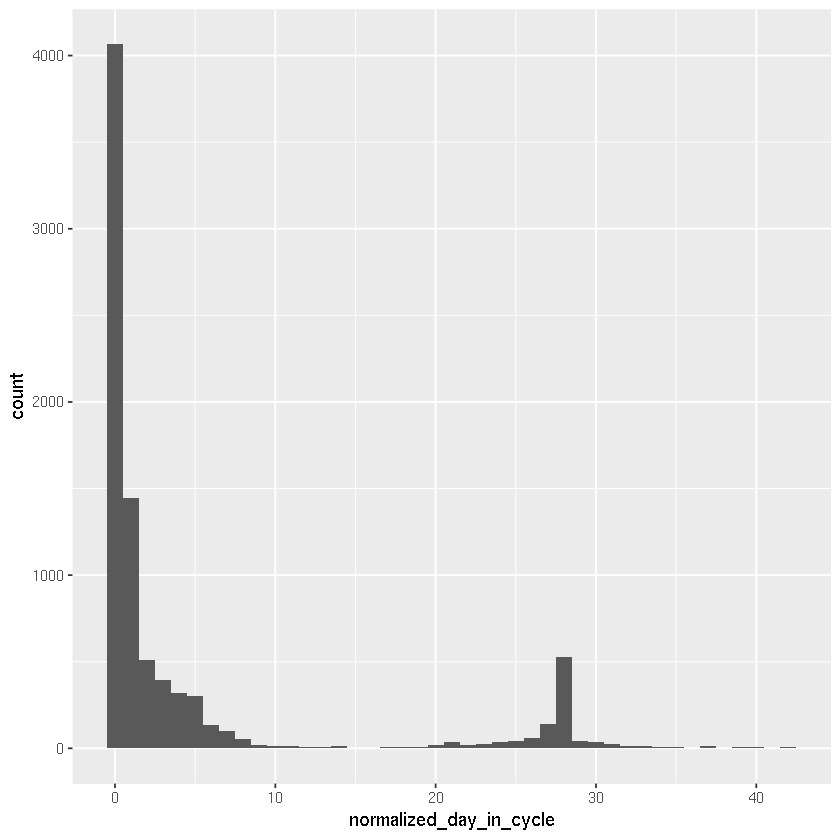

In [23]:
#meno_today and meno_time to validate - should be a distribution
ggplot(filter(ss_mat4.3, period_today==1), aes(day_in_cycle))+geom_histogram(binwidth=1)
### disproportionately day 0! I think ppl are mis-interpreting, estimate this
ggplot(filter(ss_mat4.3, period_today==1), aes(normalized_day_in_cycle))+geom_histogram(binwidth=1)


Warning message:
“Removed 475460 rows containing non-finite values (stat_bin).”

Warning message:
“Removed 468310 rows containing non-finite values (stat_bin).”

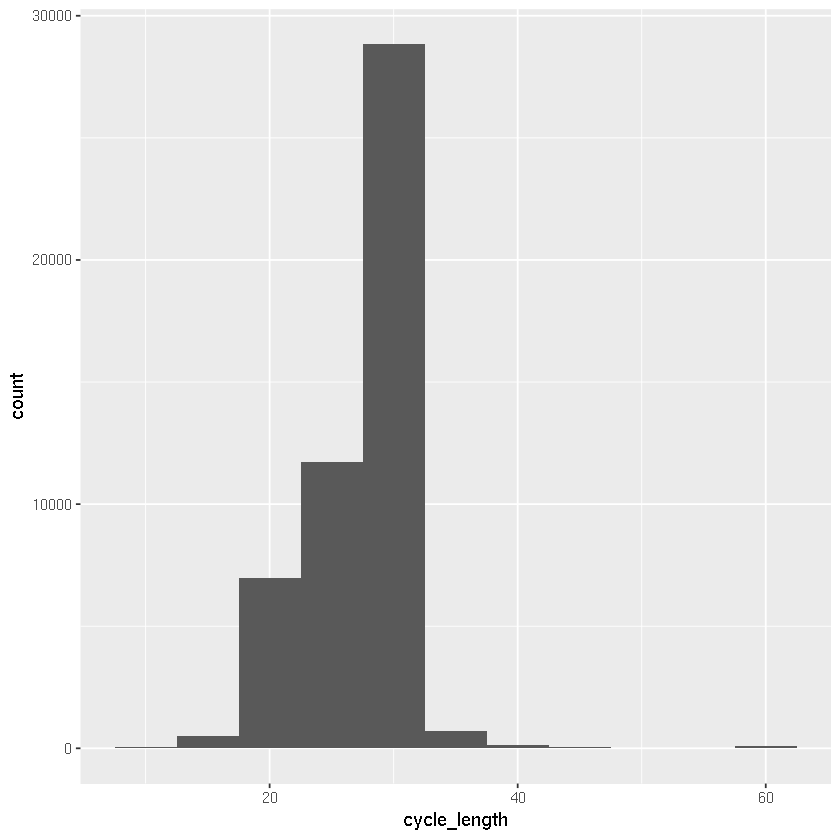

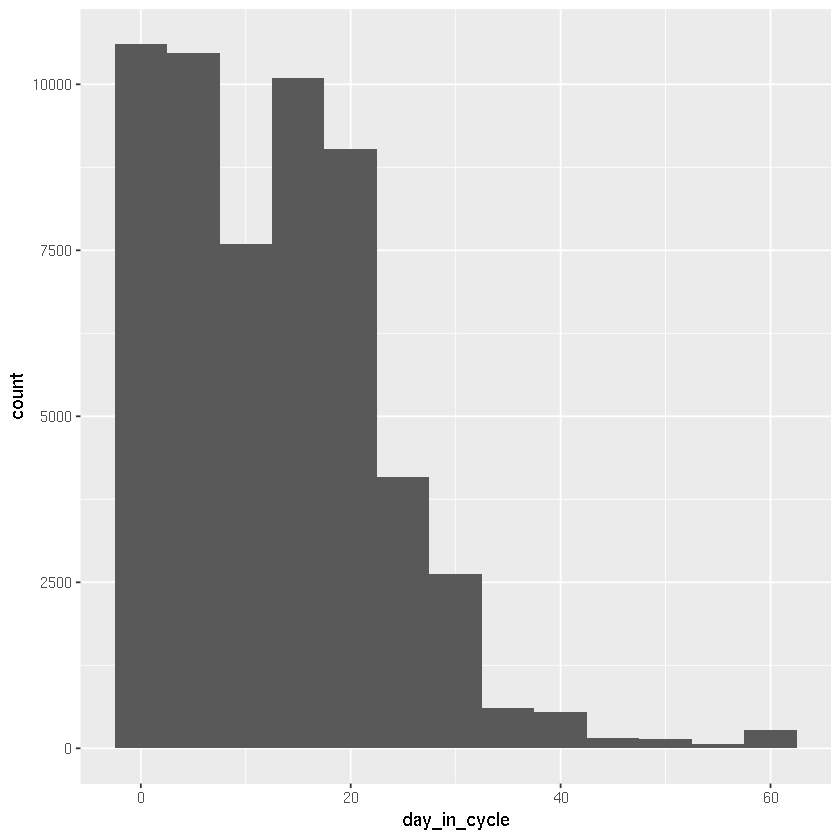

In [20]:
ggplot(ss_mat4.3, aes(cycle_length))+geom_histogram(binwidth=5)
ggplot(ss_mat4.3, aes(day_in_cycle))+geom_histogram(binwidth=5)

## SANITY CHECKING

In [33]:
head(meno_df2)
colnames(meno_df2)

IID,sex,age_v0,visit,preg,pill,hrt,ooph,hyster,meno,⋯,years.post,surgical.meno,meno.label,period_today,irregular,cycle_length,outside_cycle,day_in_cycle,normalized_day_in_cycle,menstrual_phase
2502845,1,50,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,male,NA,NA,NA,NA,NA,NA,NA
2314965,0,55,0,0,0,NA,0,0,NA,⋯,NA,0,missing,0,NA,NA,NA,NA,NA,NA
1142584,0,60,0,0,0,0,0,0,1,⋯,15,0,post,NA,NA,NA,NA,NA,NA,NA
3665122,0,74,0,0,NA,0,0,1,1,⋯,32,1,surgical_meno,NA,NA,NA,NA,NA,NA,NA
4377492,0,65,0,0,0,NA,0,0,1,⋯,13,0,post,NA,NA,NA,NA,NA,NA,NA
2652670,1,58,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,male,NA,NA,NA,NA,NA,NA,NA


[1] "IID"                     "sex"                    
 [3] "age_v0"                  "visit"                  
 [5] "preg"                    "pill"                   
 [7] "hrt"                     "ooph"                   
 [9] "hyster"                  "meno"                   
[11] "hyster2"                 "meno.age"               
[13] "years.post"              "surgical.meno"          
[15] "meno.label"              "period_today"           
[17] "irregular"               "cycle_length"           
[19] "outside_cycle"           "day_in_cycle"           
[21] "normalized_day_in_cycle" "menstrual_phase"

In [ ]:
meno_df2$qc_fail <- 0

In [51]:

# 1) pregnant post-menopause
preg_post_meno = (meno_df2$meno.label %in% c("post", "surgical_meno") & meno_df2$preg==1)
print(sprintf("Removed %s b/c pregnant post-menopause",sum(preg_post_meno[!is.na(preg_post_meno)])))
meno_df2[preg_post_meno[!is.na(preg_post_meno)],]$qc_fail <- 1



[1] "Removed 32 b/c pregnant post-menopause"


In [54]:
# 2) pre-menopausal and had an oophorectomy
pre_meno_oo <- (meno_df2$meno.label=="pre" & meno_df2$ooph==1) 
pre_meno_oo <- pre_meno_oo[!is.na(pre_meno_oo)]
print(sprintf("Removed %s b/c pre-menopausal and had an oophorectomy",sum(pre_meno_oo)))

#meno_df2[pre_meno_oo,]$qc_fail <- 1



[1] "Removed 0 b/c pre-menopausal and had an oophorectomy"


In [55]:
# 3) hysterectomy or ooph and pregnant

preg_and_surg <- ((meno_df2$hyster==1 & meno_df2$preg==1) | (meno_df2$ooph==1 & meno_df2$preg==1) | 
                  (meno_df2$meno.label=="surgical_meno" & meno_df2$preg==1))
preg_and_surg <- preg_and_surg[!is.na(preg_and_surg)]
print(sprintf("Removed %s b/c pregnant and had surgical menopause",sum(preg_and_surg)))
meno_df2[preg_and_surg,]$qc_fail <- 1

[1] "Removed 7 b/c pregnant and had surgical menopause"


In [62]:
# 4) menopause, oophorectomy, hysterectomy, pregnant != menstruating
table(meno_df2$meno.label=="post" & meno_df2$period_today==1)
table(meno_df2$meno.label=="surgical_meno" & meno_df2$period_today==1)
table(meno_df2$ooph==1 & meno_df2$period_today==1)
table(meno_df2$hyster==1 & meno_df2$period_today==1)
table(meno_df2$preg==1 & meno_df2$period_today==1)


qc_fails <- ((meno_df2$meno.label=="post" & meno_df2$period_today==1) |
(meno_df2$meno.label=="surgical_meno" & meno_df2$period_today==1) |
(meno_df2$ooph==1 & meno_df2$period_today==1) |
(meno_df2$hyster==1 & meno_df2$period_today==1) |
(meno_df2$preg==1 & meno_df2$period_today==1))

meno_df2[qc_fails[!is.na(qc_fails)],]$qc_fail <- 1





 FALSE   TRUE 
409719    472 


 FALSE   TRUE 
511377     69 


 FALSE   TRUE 
317144     48 


 FALSE   TRUE 
280776     38 


 FALSE   TRUE 
343856     11 

In [68]:
table(meno_df2$qc_fail)


     0      1 
571326   2864 

In [70]:
# menstrual period recently - less sure about this
table(meno_df2$meno.label=="post" & !(is.na(meno_df2$day_in_cycle) ) )
table(meno_df2$meno.label=="surgical_meno" & !is.na(meno_df2$day_in_cycle))
table(meno_df2$ooph==1 & !is.na(meno_df2$day_in_cycle))
table(meno_df2$hyster==1 & !is.na(meno_df2$day_in_cycle))
#table(meno_df2$preg==1 & meno_df2$day_in_cycle < 14)

      
qc_fails2 <- ((meno_df2$meno.label=="post" & !(is.na(meno_df2$day_in_cycle)) ) |  
(meno_df2$meno.label=="surgical_meno" & !is.na(meno_df2$day_in_cycle)) |
(meno_df2$ooph==1 & !is.na(meno_df2$day_in_cycle)) | 
(meno_df2$hyster==1 & !is.na(meno_df2$day_in_cycle)))
      
meno_df2[qc_fails2[!is.na(qc_fails2)],]$qc_fail <- 1

table(meno_df2$qc_fail)
#hist(filter(meno_df2, meno.label=="post")$day_in_cycle)
                                      


 FALSE   TRUE 
571846   2344 


 FALSE   TRUE 
573841    349 


 FALSE   TRUE 
573986    194 


 FALSE   TRUE 
573861    179 


     0      1 
568637   5553 

In [71]:
write.table(meno_df2, file="../data/phase_meno_qc.txt", sep="\t", quote=FALSE, row.names=FALSE)

In [41]:
# HRT vs menopause (expect mostly post-menopausal)
table(meno_df2$meno.label, meno_df2$hrt==1)

# birth_control: expect mostly pre-menopausal
table(meno_df2$meno.label, meno_df2$pill==1)


               
                FALSE  TRUE
  likely_meno     634   466
  male             37   115
  missing        4269  2218
  missing_age      17     7
  peri             22    22
  post          60166  7104
  pre             918   540
  premature      9412  1513
  surgical_meno 34967  8512

               
                 FALSE   TRUE
  likely_meno     5890    158
  male              50      5
  missing        19501   1006
  missing_age       23      0
  peri             239      0
  post          132783    146
  pre            52784   4405
  premature      13255     44
  surgical_meno  49498     24

In [42]:
# [ age at menopause < current age  for first visit ]

# if late / outside_cycle == menopause later?
# EXPLORATORY
# - what do irregular cycles look like?
# - does anyone report irregular cycles on the pill? yupppp
table(meno_df2$irregular==1, meno_df2$pill==1)

       
        FALSE  TRUE
  FALSE 46004  2811
  TRUE  10885  1055

#### Look at repeat visits

In [ ]:
# 2nd visit

# how many are still pre-menopause?

# phase information